# Example Notebook for ERA5 data
Author(s): [Bjorn Backeberg](mailto:backeb@gmail.com) (backeb) <br> 
Creation date: 16-Jul-2019 <br>
Last updated:  17-Jul-2019 <br>

---

## Purpose
1. Load monthly rainfall and temperature ERA5 netcdf data for user defined location, data can be downloaded [here](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels-monthly-means?tab=overview)
2. Calculate annual anomaly
3. Plot as warming stripes (https://en.wikipedia.org/wiki/Warming_stripes)


### Import necessary libraries

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

### User input
In the below cell, define the longitude (positive, decimal degrees East) and latitude (positive, decimal degrees North) for the location you wish to plot the warming stripes.

In [2]:
lon_in = 18.452758
lat_in = -33.928570

### Load dataset as a dataframe

In [9]:
# open dataset for nearest user defined location
ds = xr.open_dataset('data/ERA5_temperature.nc').sel(longitude = lon_in, 
                                                                 latitude = lat_in,
                                                                 method = 'nearest')
# convert to pandas dataframe
df = ds.to_dataframe()

# display the last 10 rows of the dataframe
df[-10:]

CPU times: user 11.6 ms, sys: 4.21 ms, total: 15.8 ms
Wall time: 16.4 ms


### Exercise 1: Calculate annual anomaly
There is a problem with the anomaly calculation below. Fix it. <br>
<br>
Hints:
1. Have a look at the monthly data for 2019
2. Check out [this](https://stackoverflow.com/questions/13851535/delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression-involving) possible solution

In [4]:
# calculate the monthly mean values
anomaly = df.groupby([df.index.year]).mean()

# subtract the long term mean from the monthly mean values for temperature and rainfall
anomaly['t2m'] = anomaly['t2m'] - df['t2m'].mean()

# display the first 10 rows of the result
anomaly[-10:]

,longitude,latitude,t2m
time,,,
2010,18.5,-34.0,0.021759
2011,18.5,-34.0,-0.004272
2012,18.5,-34.0,0.101379
2013,18.5,-34.0,0.097870
2014,18.5,-34.0,0.425659
2015,18.5,-34.0,0.254791
2016,18.5,-34.0,0.465912
2017,18.5,-34.0,0.206299
2018,18.5,-34.0,0.316772


### Create temperature stack to plot as stripes

In [5]:
temperature = anomaly['t2m'].values
stack = np.stack((temperature, temperature))

# print shapes to see what you've done
print(temperature.shape)
print(stack.shape)

(41,)
(2, 41)


### Plot the warming stripes

Text(0.5, 1.0, 'ERA5 temperature anomaly: 1979-2018')

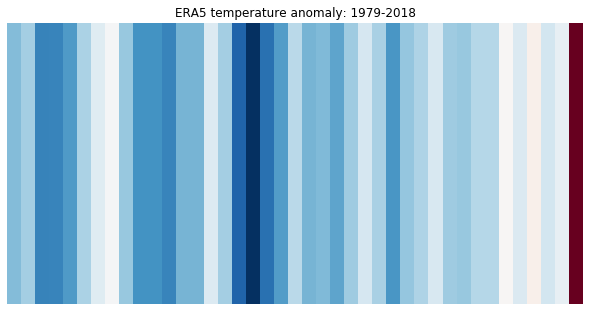

In [6]:
vmin = temperature.min()
vmax = temperature.max()
## plotting
###############
plt.figure(figsize=(8,40))
# img = plt.imshow(stack, cmap='RdBu_r', aspect=20, vmin=vmin, vmax=vmax)
img = plt.imshow(stack, cmap='RdBu_r', aspect=10, )

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.title('ERA5 temperature anomaly: 1979-2018')

#plt.savefig("stripes.png", bbox_inches = 'tight', pad_inches = 0, dpi=400)

### Exercise 2: Calculate the anomaly and plot the warming stripes for rainfall (variable name = tp) 

In [ ]:
# Add you solution to Exercise 2

## Answers to Exercises

### Exercise 1
Add the below line of code before calculating the anomaly to remove the 4 months of data in 2019

In [ ]:
df = df.drop(df[df.index.year >= 2019].index)

### Exercise 2

Text(0.5, 1.0, 'ERA5 total rainfall anomaly: 1979-2018')

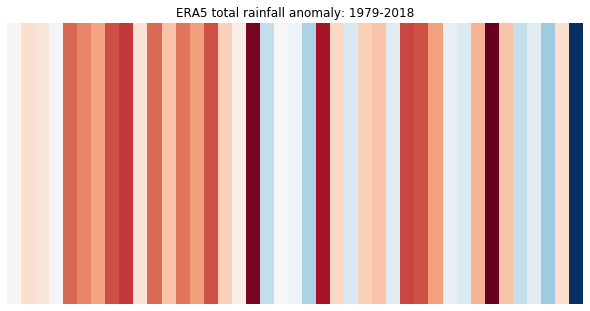

In [8]:
# open dataset for nearest user defined location
ds = xr.open_dataset('data/ERA5_rainfall.nc').sel(longitude = lon_in, 
                                                              latitude = lat_in,
                                                              method = 'nearest')
# convert to pandas dataframe
df = ds.to_dataframe()

# calculate the monthly mean values
anomaly = df.groupby([df.index.year]).mean()

# calculate anomaly
anomaly['tp'] = anomaly['tp'] - df['tp'].mean()
rainfall = anomaly['tp'].values

stack2 = np.stack((rainfall, rainfall))
vmin = rainfall.min()
vmax = rainfall.max()

plt.figure(figsize=(8,40))
# img = plt.imshow(stack2, cmap='RdBu_r', aspect=20, vmin=vmin, vmax=vmax)
img = plt.imshow(stack2, cmap='RdBu_r', aspect=10, )

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.title('ERA5 total rainfall anomaly: 1979-2018')

#plt.savefig("stripes.png", bbox_inches = 'tight', pad_inches = 0, dpi=400)